#### Impedindo notebook de escrever bytecode

In [1]:
import sys
sys.dont_write_bytecode = True

#### Inserindo caminho dos módulos em sys.path

In [2]:
import pathlib
import os
sys.path.append(str(pathlib.Path(os.getcwd()).parent.parent.resolve()))

#### Importando módulos

In [3]:
from modules.point import PointDataset
from modules.classifier import ConvexHullClassifier, KNNClassifier, ClassifiersComparison
from random import choices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Lendo dataset

In [4]:
dataset = PointDataset("./data.dat", labelTranslation={"1": 1, "0": -1}, valueTranslation={"Present": 1, "Absent": -1})
points = dataset.getPoints()

#### Criando construtor de instância do classificador baseado em envoltória convexa para as features (0, 1)

In [5]:
CHclf01 = ConvexHullClassifier.buildInstance(name="ConvexHullClassifier01", coordinate1=0, coordinate2=1, nFolds=5)

#### Criando construtor de instância do classificador baseado em envoltória convexa para as features (0, 2)

In [6]:
CHclf02 = ConvexHullClassifier.buildInstance(name="ConvexHullClassifier02", coordinate1=0, coordinate2=2, nFolds=5)

#### Criando construtor de instância do classificador baseado em envoltória convexa para as features (1, 2)

In [7]:
CHclf12 = ConvexHullClassifier.buildInstance(name="ConvexHullClassifier12", coordinate1=1, coordinate2=2, nFolds=5)

#### Criando construtor de instância do classificador KNN com otimização iterativa do número de vizinhos

A otimização é feita da seguinte forma: validação cruzada com 5 folds é executada para classificador, variando o número de vizinhos de 1 a _maxK_. É escolhido o número de vizinhos que apresenta a melhor _F1 Score_ média entre os folds. Se _makK_ não for passado, _maxK_ é igual à raíz quadrada do tamanho do dataset.

In [8]:
KNNclf = KNNClassifier.buildInstance(maxK=30, nFolds=5)

#### Comparação da diferença média para as métricas _Precisão_, _Sensibilidade_, _F1 Score_ e _Acurácia_ entre os classificadores par a par

Para efeutar a comparação, um bootstrapping foi feito usando 100 amostras com reposição e 100 indivíduos em cada uma delas.

In [9]:
clfComparison = ClassifiersComparison(points, [KNNclf, CHclf01, CHclf02, CHclf12], sampleSize=100, nSamples=100)
meanDiff = clfComparison.run()
meanDiff

/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:82: RuntimeWarning: invalid value encountered in double_scalars
  f1 = (2*precision*recall)/(precision + recall)
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:70: RuntimeWarning: invalid value encountered in long_scalars
  recall: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:82: RuntimeWarning: invalid value encountered in double_scalars
  f1 = (2*precision*recall)/(precision + recall)
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:70: RuntimeWarning: invalid value encountered in long_scalars
  re

,Precision,Recall,F1,Accuracy,Label
0,0.055556,-0.500000,0.055556,0.200000,KNNClassifier/ConvexHullClassifier01
1,-0.021739,-0.909091,-0.021739,0.000000,KNNClassifier/ConvexHullClassifier01
2,-0.071429,-0.700000,-0.071429,0.000000,KNNClassifier/ConvexHullClassifier01
3,-0.250000,-0.833333,-0.250000,0.066667,KNNClassifier/ConvexHullClassifier01
4,0.129412,-0.127273,0.129412,0.133333,KNNClassifier/ConvexHullClassifier01
...,...,...,...,...,...
1195,-0.125000,0.066667,-0.125000,0.100000,ConvexHullClassifier12/ConvexHullClassifier02
1196,-0.366667,0.818182,-0.366667,-0.366667,ConvexHullClassifier12/ConvexHullClassifier02
1197,NaN,-0.600000,NaN,0.000000,ConvexHullClassifier12/ConvexHullClassifier02
1198,-0.066667,0.454545,-0.066667,-0.200000,ConvexHullClassifier12/ConvexHullClassifier02


#### Plot dos histogramas de diferença média para as métricas entre os classificadores KNN e Convex Hull para as features (0, 1)

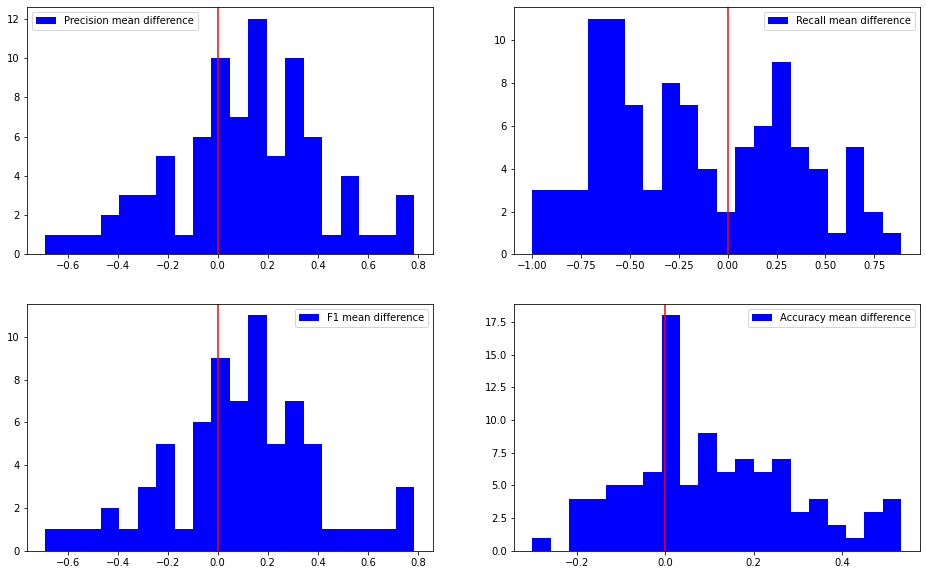

In [13]:
comparisonDiff = meanDiff[meanDiff['Label'] == 'KNNClassifier/ConvexHullClassifier01']

fig, ax = plt.subplots(2, 2, figsize=(16, 10))

ax[0][0].hist(comparisonDiff[~np.isnan(comparisonDiff["Precision"])]["Precision"], bins=20, label="Precision mean difference", color='b')
ax[0][0].legend()
ax[0][0].axvline(x=0, color='r')

ax[0][1].hist(comparisonDiff[~np.isnan(comparisonDiff["Recall"])]["Recall"], bins=20, label="Recall mean difference", color='b')
ax[0][1].legend()
ax[0][1].axvline(x=0, color='r')

ax[1][0].hist(comparisonDiff[~np.isnan(comparisonDiff["F1"])]["F1"], bins=20, label="F1 mean difference", color='b')
ax[1][0].legend()
ax[1][0].axvline(x=0, color='r')

ax[1][1].hist(comparisonDiff[~np.isnan(comparisonDiff["Accuracy"])]["Accuracy"], bins=20, label="Accuracy mean difference", color='b')
ax[1][1].legend()
ax[1][1].axvline(x=0, color='r')

#### Plot dos histogramas de diferença média para as métricas entre os classificadores KNN e Convex Hull para as features (0, 2)

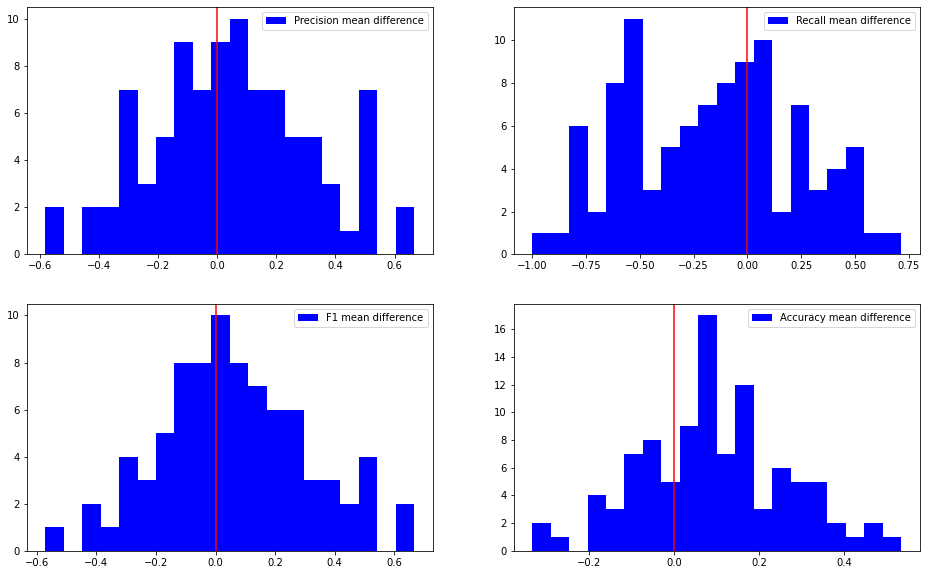

In [14]:
comparisonDiff = meanDiff[meanDiff['Label'] == 'KNNClassifier/ConvexHullClassifier02']

fig, ax = plt.subplots(2, 2, figsize=(16, 10))

ax[0][0].hist(comparisonDiff[~np.isnan(comparisonDiff["Precision"])]["Precision"], bins=20, label="Precision mean difference", color='b')
ax[0][0].legend()
ax[0][0].axvline(x=0, color='r')

ax[0][1].hist(comparisonDiff[~np.isnan(comparisonDiff["Recall"])]["Recall"], bins=20, label="Recall mean difference", color='b')
ax[0][1].legend()
ax[0][1].axvline(x=0, color='r')

ax[1][0].hist(comparisonDiff[~np.isnan(comparisonDiff["F1"])]["F1"], bins=20, label="F1 mean difference", color='b')
ax[1][0].legend()
ax[1][0].axvline(x=0, color='r')

ax[1][1].hist(comparisonDiff[~np.isnan(comparisonDiff["Accuracy"])]["Accuracy"], bins=20, label="Accuracy mean difference", color='b')
ax[1][1].legend()
ax[1][1].axvline(x=0, color='r')

#### Plot dos histogramas de diferença média para as métricas entre os classificadores KNN e Convex Hull para as features (1, 2)

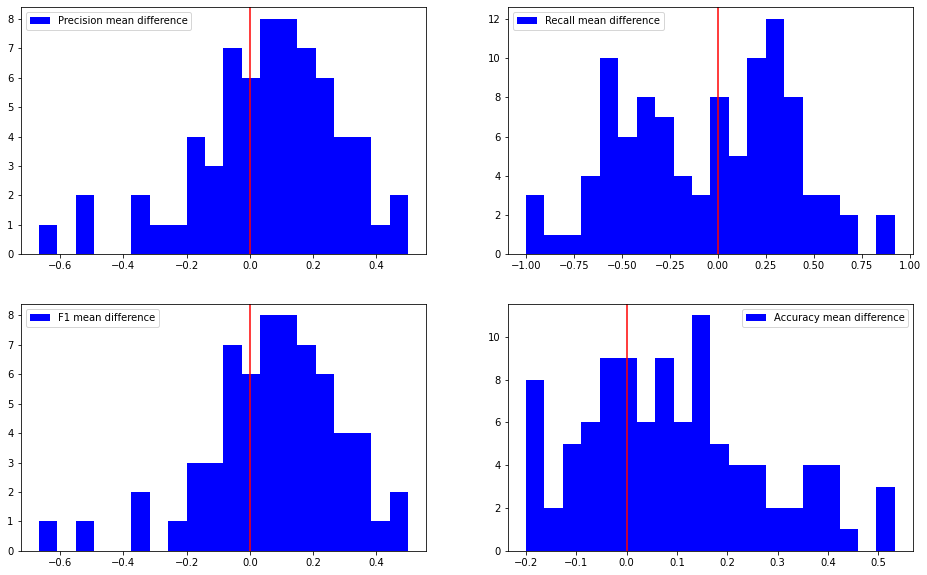

In [15]:
comparisonDiff = meanDiff[meanDiff['Label'] == 'KNNClassifier/ConvexHullClassifier12']

fig, ax = plt.subplots(2, 2, figsize=(16, 10))

ax[0][0].hist(comparisonDiff[~np.isnan(comparisonDiff["Precision"])]["Precision"], bins=20, label="Precision mean difference", color='b')
ax[0][0].legend()
ax[0][0].axvline(x=0, color='r')

ax[0][1].hist(comparisonDiff[~np.isnan(comparisonDiff["Recall"])]["Recall"], bins=20, label="Recall mean difference", color='b')
ax[0][1].legend()
ax[0][1].axvline(x=0, color='r')

ax[1][0].hist(comparisonDiff[~np.isnan(comparisonDiff["F1"])]["F1"], bins=20, label="F1 mean difference", color='b')
ax[1][0].legend()
ax[1][0].axvline(x=0, color='r')

ax[1][1].hist(comparisonDiff[~np.isnan(comparisonDiff["Accuracy"])]["Accuracy"], bins=20, label="Accuracy mean difference", color='b')
ax[1][1].legend()
ax[1][1].axvline(x=0, color='r')